In [1]:
from archappl.client import ArchiverDataClient
from phantasy import MachinePortal
from datetime import datetime
%matplotlib notebook

In [3]:
mp = MachinePortal("FRIB", "MEBT2FS1A")
bpms = mp.get_elements(type="BPM")
client = ArchiverDataClient()
client.url = "http://epicsarchiver0.ftc:17668"

INFO: 2019-06-19 14:42:41,435: phantasy.library.parser.config: Searching configuration in relative or absolute path: 'FRIB'
INFO: 2019-06-19 14:42:41,437: phantasy.library.parser.config: Searching configuration under path: '/user/zhangt/test_phantasy/phantasy-machines' 'FRIB'
INFO: 2019-06-19 14:42:41,441: phantasy.library.parser.config: Importing 'FRIB' from '/user/zhangt/test_phantasy/phantasy-machines/FRIB'
INFO: 2019-06-19 14:42:41,448: phantasy.library.parser.config: Using config file: phantasy.ini
INFO: 2019-06-19 14:42:41,532: phantasy.library.operation.lattice: Using CSV/SQLite instead of CFS '/user/zhangt/test_phantasy/phantasy-machines/FRIB/./mebt2fs1a/channels.csv'
INFO: 2019-06-19 14:42:41,533: phantasy.library.pv.datasource: Set source to be CSV table: channels.csv.
INFO: 2019-06-19 14:42:41,624: phantasy.library.operation.lattice: Model data directory: /user/zhangt/phantasy_data/20190619/model_data/data_144241
INFO: 2019-06-19 14:42:41,631: phantasy.library.operation.latt

In [3]:
pvs_x = [i.pv('X', handle='readback')[0] for i in bpms]
pvs_y = [i.pv('Y', handle='readback')[0] for i in bpms]

In [4]:
ts0 = "2019-03-05T13:04:08.120000"
dt = datetime.strptime(ts0, "%Y-%m-%dT%H:%M:%S.%f")

In [5]:
ts0_epoch = dt.timestamp()

In [6]:
_ts0 = datetime.fromtimestamp(ts0_epoch).isoformat() + "-05:00"

In [7]:
print(_ts0)

2019-03-05T13:04:08.120000-05:00


In [8]:
r = client.get_data_at_time([pvs_x[0]], ts=_ts0)

In [9]:
r

{'FE_MEBT:BPM_D1056:XPOS_RD': {'nanos': 4464964,
  'secs': 1551809048,
  'severity': 0,
  'status': 0,
  'val': -0.944449345999152}}

In [4]:
client

[Data Client] Archiver Appliance on: http://epicsarchiver0.ftc:17668/retrieval/data/getData.json

In [45]:
data = client.get_data('FE_LEBT:PSC2_D0773:I_CSET',
                       ifrom='2019-03-01T13:04:08.120000-05:00',
                       to='2019-04-01T21:20:08.120000-05:00')

<IPython.core.display.Javascript object>


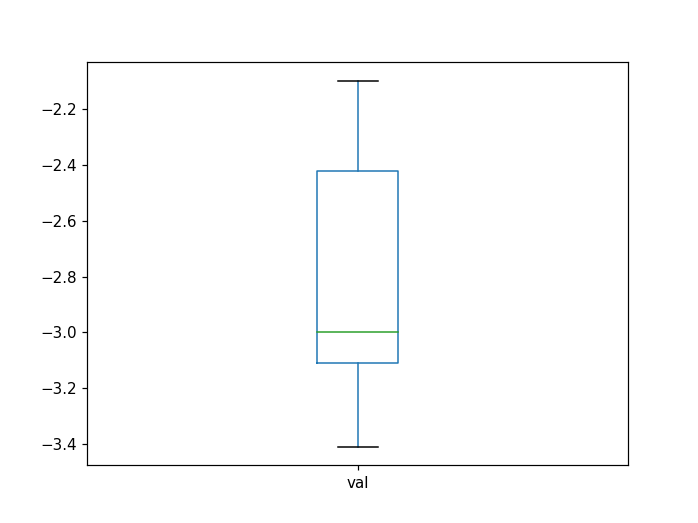

In [64]:
data.plot(x=data.index, y='val', kind='box')

In [44]:
client.get_data_at_time(['FE_LEBT:PSC2_D0773:I_CSET'], ts='2019-03-08T09:58:23.502054-05:00')

{}

In [11]:
from archappl.client import ArchiverMgmtClient

In [12]:
admin_client = ArchiverMgmtClient()
admin_client.url = "http://epicsarchiver0.ftc:17665"

In [13]:
admin_client

[Admin Client] Archiver Appliance on: http://epicsarchiver0.ftc:17665/mgmt/bpl

# TS range

In [2]:
from archappl.data import iso_to_epoch, epoch_to_iso

In [3]:
ts0_iso = "2019-03-05T15:30:00.000001-05:00"
ts0_epoch, tz = iso_to_epoch(ts0_iso)

In [4]:
ts0_epoch

1551817800.000001

In [5]:
delt_sec = 300
t0 = ts0_epoch - delt_sec
t1 = ts0_epoch + delt_sec
ts_begin = epoch_to_iso(t0)
ts_end = epoch_to_iso(t1)
print(ts_begin, ts_end)

2019-03-05T15:25:00.000001-05:00 2019-03-05T15:35:00.000001-05:00


In [6]:
import numpy as np

In [7]:
pv_list = pvs_x[0::1]
n_ts = 300
n_elem = len(pv_list)
ts_list = [epoch_to_iso(i, tz) for i in np.linspace(t0, t1, n_ts)]
m = []
#m = np.zeros([n_ts, n_elem])

NameError: name 'pvs_x' is not defined

In [20]:
r0 = client.get_data_at_time(pv_list[0:1], ts=ts_list[0])

In [23]:
r0

{'FE_MEBT:BPM_D1056:XPOS_RD': {'nanos': 201743591,
  'secs': 1551817498,
  'severity': 0,
  'status': 0,
  'val': -0.9757415155015057}}

In [21]:
ts_list[0]
pv_list[0:1]

['FE_MEBT:BPM_D1056:XPOS_RD']

In [24]:
for i, its in enumerate(ts_list):
    r = client.get_data_at_time(pv_list, ts=its)
    m.append([r[pv]['val'] for pv in pv_list if pv in r])

In [25]:
results = np.array(m)

In [37]:
r1 = client.get_data_at_time(pv_list, ts=its)
r1

{}

In [38]:
valid_pvs = [k for k in pv_list if k in list(r.keys())]

In [39]:
import pickle

In [40]:
data = {'results': results, 'pvs': valid_pvs, 'ts_iso': ts_list, 'ts': np.linspace(t0, t1, n_ts)}

In [41]:
with open('data1.pkl', 'wb') as fp:
    pickle.dump(data, fp)